In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os
print(os.listdir("C:/Users/jjh."))


['.android', '.AndroidStudio3.0', '.AndroidStudio3.2', '.AndroidStudio3.4', '.astropy', '.bash_history', '.conda', '.emulator_console_auth_token', '.gitconfig', '.gradle', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.oracle_jre_usage', '.PyCharmCE2019.1', '.python_history', '3D Objects', 'AndroidStudioProjects', 'ansel', 'ApkProjects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'Foxit Reader SDK ActiveX.ini', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{1c3790b4-b8ad-11e8-aa21-e41d2d101530}.TM.blf', 'NTUSER.DAT{1c3790b4-b8ad-11e8-aa21-e41d2d101530}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{1c3790b4-b8ad-11e8-aa21-e41d2d101530}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'PycharmProjects', 'Recent', 'sa

In [13]:
#load data
train_tran = pd.read_csv('C:/Users/jjh/train_transaction.csv',index_col='TransactionID')
train_iden = pd.read_csv('C:/Users/jjh/train_identity.csv', index_col='TransactionID')
test_tran = pd.read_csv('C:/Users/jjh/test_transaction.csv', index_col='TransactionID')
test_iden = pd.read_csv('C:/Users/jjh/test_identity.csv', index_col='TransactionID')
sample_sub = pd.read_csv('C:/Users/jjh/sample_submission.csv', index_col='TransactionID')

In [14]:
#join taining datasets
train = train_tran.merge(train_iden, how='left',left_index=True, right_index=True)
train.shape

(590540, 433)

In [13]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [15]:
#join testing datasets
test = test_tran.merge(test_iden, how='left',left_index=True,right_index=True)
test.shape

(506691, 432)

In [16]:
test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get target feature
y_train = train['isFraud'].copy()
y_train.shape


In [17]:
y_train.head()

NameError: name 'y_train' is not defined

In [18]:
#get features matrices
X_train=train.drop('isFraud',axis=1)
X_test=test.copy()

In [19]:
del test, train_tran, train_iden, test_tran, test_iden

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(12,4))
isFraud=sns.countplot(x='isFraud',data=train, ax=axes[0])
ProductCD=sns.countplot(x='ProductCD',data=train,ax=axes[1])
DeviceType=sns.countplot(x='DeviceType',data=train,ax=axes[2])
plt.tight_layout()

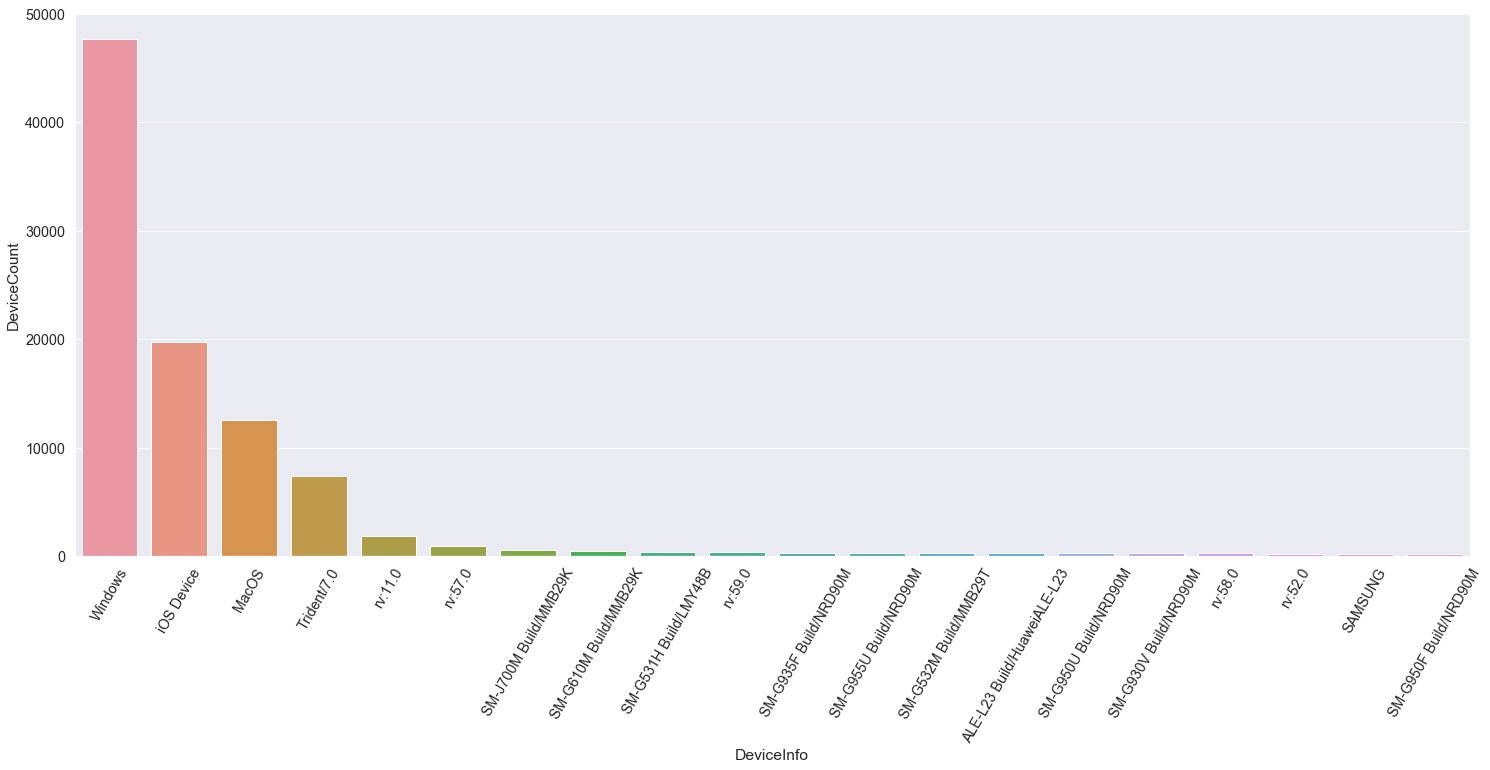

In [35]:
#first create a dataframe with 2 cols : device info and the count bt device
group = pd.DataFrame()
group['DeviceCount'] = train.groupby(['DeviceInfo'])['DeviceInfo'].count()
group['DeviceInfo'] = group.index

#there are too many Device, so we will subset the top 20
group_top = group.sort_values(by='DeviceCount',ascending=False).head(20)

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="DeviceInfo", y="DeviceCount", data=group_top)
xt = plt.xticks(rotation=60)

In [ ]:
#this variable is NOT listed as categorical, but clearly is 
plt.figure(figsize=(10,5))
sns.set(color_codes=True)
sns.set(front_scale=1.3)
ax=sns.countplot(x='ProductCD',data=train)

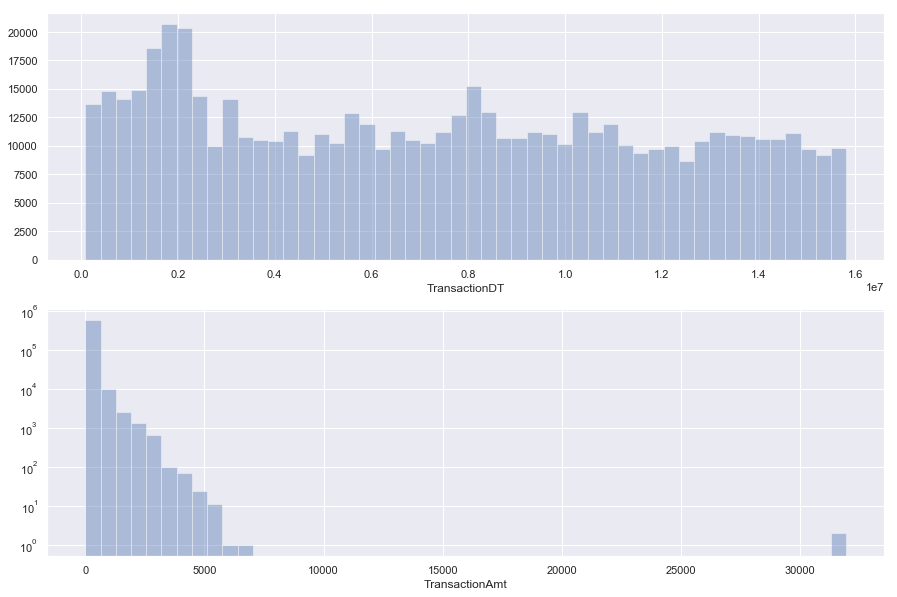

In [18]:
#Plot XII: TransactionDT, TransactionAMT
f, axes = plt.subplots(2, 1, figsize=(15, 10))

dt = sns.distplot(train.TransactionDT,kde=False, ax=axes[0])
am = sns.distplot(train.TransactionAmt,kde=False, hist_kws={'log':True}, ax=axes[1])
